In [1]:
# Applying Gaussian Filter

#load image data
#importing necessary libraries
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

class_names = ['Closed_Eyes','Open_Eyes']


# Function to read and preprocess images, including Gaussian blurring
def get_data_from_folder(path, apply_gaussian_blur=False):
    data = []

    for class_name in class_names:  # Iterate through classes
        try:
            files = glob.glob(path + "/" + class_name + "/*.png")  # Get files in each class (assuming JPG format)
            for f in files:
                img = cv2.imread(f)  # Read the image
                img = cv2.resize(img, (240, 240))  # Resize the image

                if apply_gaussian_blur:
                    img = cv2.GaussianBlur(img, (5, 5), 0)  # Apply Gaussian blur

                data.append([np.array(img), class_names.index(class_name)])  # Append images and corresponding labels to data

        except:
            pass
    np.random.shuffle(data)

    return data

# Apply Gaussian blur during data loading
training_data = get_data_from_folder("D:/3rd Year/project ML/train", apply_gaussian_blur=True)


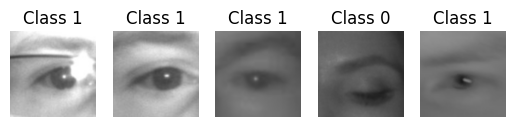

In [2]:
# Printing Images

num_images_to_display = 5  # Change this to the number of images you want to display

for i in range(num_images_to_display):
    image, label = training_data[i]

    # Display the image using matplotlib
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert image from BGR to RGB for matplotlib
    plt.title(f'Class {label}')
    plt.axis('off')

plt.show()

In [3]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ...
class_names = ['Closed_Eyes', 'Open_Eyes']

# Function to read and preprocess images, including Median filtering
def get_data_from_folder(path, apply_median_filter=False):
    data = []

    for class_name in class_names:  # Iterate through classes
        try:
            class_dir = os.path.join(path, class_name)
            if not os.path.exists(class_dir):
                print(f"Class directory not found: {class_dir}")
                continue

            files = glob.glob(os.path.join(class_dir, "*.png"))  # Get JPG files in each class
            if not files:
                print(f"No image files found in class directory: {class_dir}")
                continue

            for f in files:
                img = cv2.imread(f)  # Read the image
                img = cv2.resize(img, (240, 240))  # Resize the image

                if apply_median_filter:
                    img = cv2.medianBlur(img, 5)  # Apply Median filter

                data.append([np.array(img), class_names.index(class_name)])  # Append images and corresponding labels to data

        except Exception as e:
            print(f"Error processing image: {str(e)}")

    if not data:
        print("No data loaded.")
    else:
        print(f"Loaded {len(data)} images.")

    np.random.shuffle(data)

    return data

# Apply Median filter during data loading
training_data = get_data_from_folder('D:/3rd Year/project ML/train', apply_median_filter=True)

# ...

# Check the length of the training_data
print(f"Length of training_data: {len(training_data)}")

Loaded 24118 images.
Length of training_data: 24118


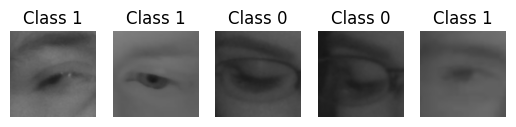

In [4]:
num_images_to_display = 5  # Change this to the number of images you want to display

for i in range(num_images_to_display):
    image, label = training_data[i]

    # Display the image using matplotlib
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert image from BGR to RGB for matplotlib
    plt.title(f'Class {label}')
    plt.axis('off')

plt.show()

In [5]:
# Mean Filter

import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ...
class_names = ['Closed_Eyes', 'Open_Eyes']

# Function to read and preprocess images, including Mean filtering
def get_data_from_folder(path, apply_mean_filter=False):
    data = []

    for class_name in class_names:  # Iterate through classes
        try:
            class_dir = os.path.join(path, class_name)
            if not os.path.exists(class_dir):
                print(f"Class directory not found: {class_dir}")
                continue

            files = glob.glob(os.path.join(class_dir, "*.png"))  # Get JPG files in each class
            if not files:
                print(f"No image files found in class directory: {class_dir}")
                continue

            for f in files:
                img = cv2.imread(f)  # Read the image
                img = cv2.resize(img, (240, 240))  # Resize the image

                if apply_mean_filter:
                    img = cv2.blur(img, (5, 5))  # Apply Mean filter

                data.append([np.array(img), class_names.index(class_name)])  # Append images and corresponding labels to data

        except Exception as e:
            print(f"Error processing image: {str(e)}")

    if not data:
        print("No data loaded.")
    else:
        print(f"Loaded {len(data)} images.")

    np.random.shuffle(data)

    return data

# Apply Mean filter during data loading
training_data = get_data_from_folder('D:/3rd Year/project ML/train', apply_mean_filter=True)

# ...

# Check the length of the training_data
print(f"Length of training_data: {len(training_data)}")


Loaded 24118 images.
Length of training_data: 24118


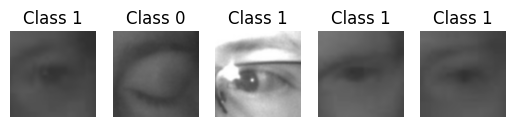

In [6]:
num_images_to_display = 5  # Change this to the number of images you want to display

for i in range(num_images_to_display):
    image, label = training_data[i]

    # Display the image using matplotlib
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert image from BGR to RGB for matplotlib
    plt.title(f'Class {label}')
    plt.axis('off')

plt.show()

In [7]:
#tf.keras.preprocessing.image_dataset_from_directory
#it will automatically append labels without you being labelling it yourself

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size=(240,240)
batch_size = 32

train_ds=image_dataset_from_directory(
    "D:/3rd Year/project ML/train",
    labels="inferred", #to take the labels from directory structure
    label_mode='int',
    validation_split=0.2,  #splitting the training data into training data and validation data
    subset="training",
    seed=1337,  #used for replication
    image_size=image_size,
    batch_size=batch_size,
)

val_ds=image_dataset_from_directory(
    "D:/3rd Year/project ML/train",
    labels="inferred", #to take the labels from directory structure
    label_mode='int',
    validation_split=0.2,  #splitting the training data into training data and validation data
    subset="validation",
    seed=1337,  #used for replication
    image_size=image_size,
    batch_size=batch_size,
)

test_ds=image_dataset_from_directory(
    "D:/3rd Year/project ML/train",
    labels = "inferred",
    label_mode = 'int',
    seed = 1337,
    image_size=image_size,
    batch_size=batch_size,
)




Found 24118 files belonging to 2 classes.
Using 19295 files for training.
Found 24118 files belonging to 2 classes.
Using 4823 files for validation.
Found 24118 files belonging to 2 classes.


In [8]:
for i in [train_ds, val_ds, test_ds]:
    class_names = i.class_names
    print(class_names)

['Closed_Eyes', 'Open_Eyes']
['Closed_Eyes', 'Open_Eyes']
['Closed_Eyes', 'Open_Eyes']


In [9]:
print(f"The Train has {len(train_ds.class_names)} classes called: {train_ds.class_names}")
print(f"The Validation has {len(val_ds.class_names)} classes called: {val_ds.class_names}")
print(f"The Test has {len(test_ds.class_names)} classes called: {test_ds.class_names}")

The Train has 2 classes called: ['Closed_Eyes', 'Open_Eyes']
The Validation has 2 classes called: ['Closed_Eyes', 'Open_Eyes']
The Test has 2 classes called: ['Closed_Eyes', 'Open_Eyes']


In [10]:
for image_batch, labels_batch in train_ds:
    print(f"Train Shape: {image_batch.shape} (Batches = {len(train_ds)})")
    print(f"Train label: {labels_batch.shape}\n")
    break
for image_batch, labels_batch in val_ds:
    print(f"Validation Shape: {image_batch.shape} (Batches = {len(val_ds)})")
    print(f"Validation label: {labels_batch.shape}\n")
    break
for image_batch, labels_batch in test_ds:
    print(f"Test Shape: {image_batch.shape} (Batches = {len(test_ds)})")
    print(f"Test label: {labels_batch.shape}\n")
    break

Train Shape: (32, 240, 240, 3) (Batches = 603)
Train label: (32,)

Validation Shape: (32, 240, 240, 3) (Batches = 151)
Validation label: (32,)

Test Shape: (32, 240, 240, 3) (Batches = 754)
Test label: (32,)



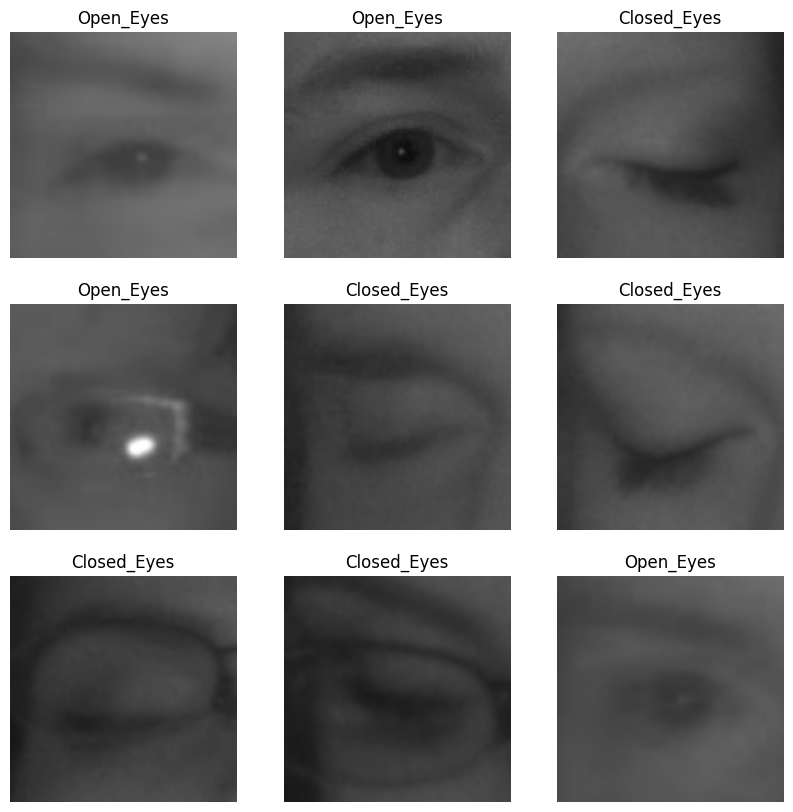

In [8]:
#visualizing the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9) :
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

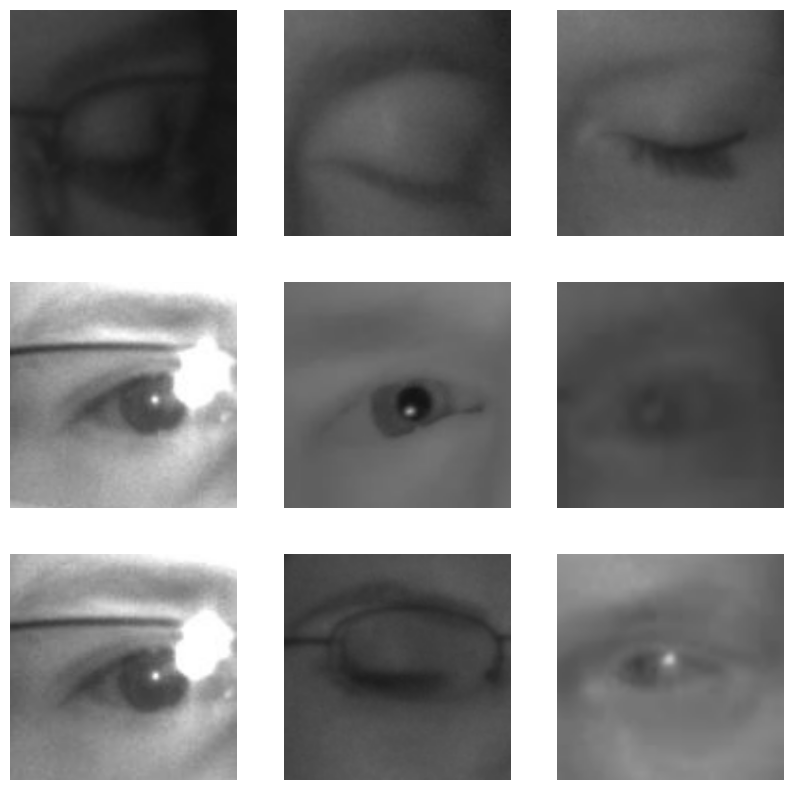

In [9]:
#augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]

)
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [13]:
#augmenting the training data set
#sequential ways of building models
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(tf.keras.layers.Dense(1024, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(2,activation = 'softmax'))